##### Steps to detect duration and frequency of ball bouncing from wav file
1. Import necessary libraries
2. Open audio File
3. Detect periods of activity
4. For Each period, find the frequency of the ball
5. Output: 
    1. Plot a graph identifying periods of activity 
    2. Plot a sample period sinsoidal wave over activity
    3. Output excel file with columns: start period, end period, duration, frequency, number of bounces

1. Import necessary libraries

In [1]:
from pydub import AudioSegment
import numpy as np
import os
import librosa
import pandas as pd
from pydub.playback import play
import matplotlib.pyplot as plt
from pydub.utils import mediainfo
import numpy, scipy.optimize
from scipy.signal import find_peaks
from scipy import signal

2. Open audio File

In [3]:
FILE_NAME='./sound_of_ball_original.wav'
info = mediainfo(FILE_NAME)
original_sample_rate=int(info['sample_rate'])
sound = AudioSegment.from_file(FILE_NAME)
# saved for easy opening using Sonic Visualizer app: https://www.sonicvisualiser.org/
file_handle = sound.export("sound_of_ball_original_2.wav", format="wav")
samples = sound.get_array_of_samples()
samples_list=samples.tolist()

3. Detect periods of activity

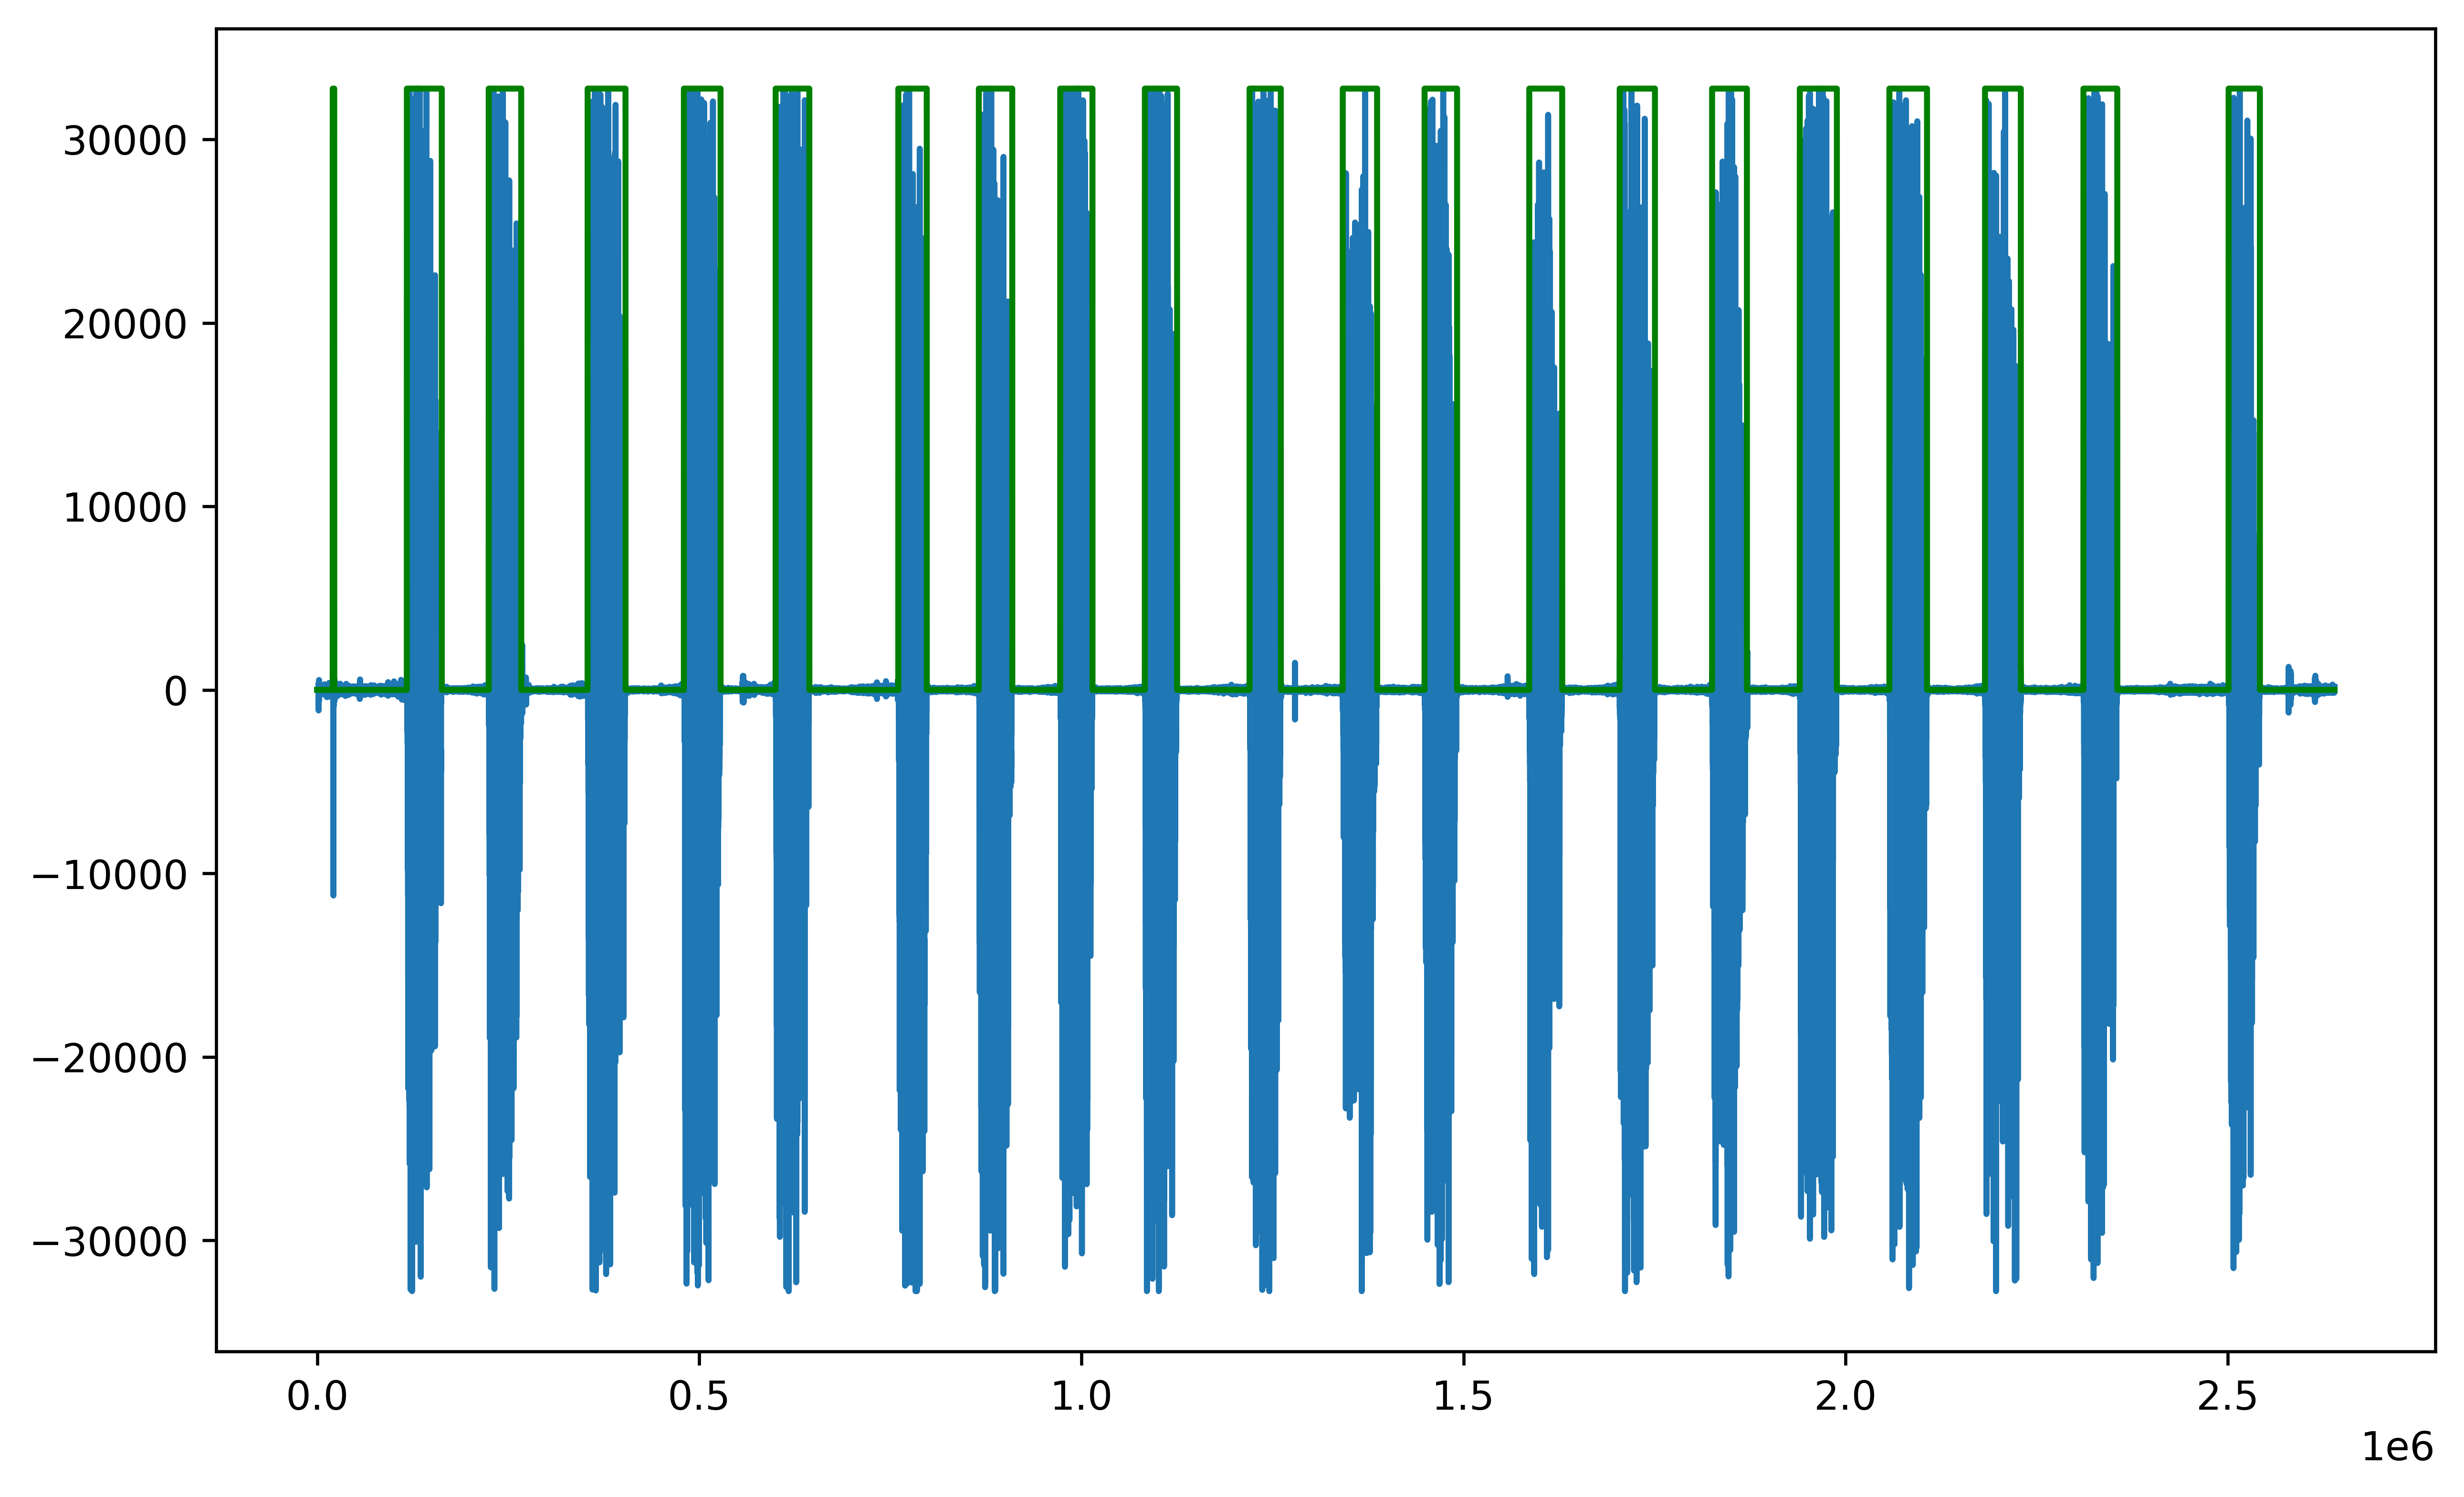

In [4]:
# 80 th percentile and window size of 100 are good estimates
window_size=1000
abs_samples_list = [abs(ele) for ele in samples_list]
abs_samples_list_pd=pd.Series(abs_samples_list)
req_percentile=np.percentile(abs_samples_list,80)
max_val=max(abs_samples_list)
# [f(x) if condition else g(x) for x in sequence]
signal_on=[max_val if x >req_percentile else 0 for x in abs_samples_list]
block_signal_on=signal_on.copy()
for i in range(window_size, len(samples_list)-window_size):
    if max_val in signal_on[i-window_size:i+window_size]:
        block_signal_on[i]=max_val
plt.figure(figsize=(10,6),dpi=600)
plt.plot(samples_list)
plt.plot(block_signal_on,'g')
plt.show()

Identify periods of activity start and end

In [7]:
signal_on_periods=[]
period_start=-1
period_end=-1
for i in range(len(block_signal_on)):
    if block_signal_on[i]!=0:
        if period_start==-1:
            period_start=i
    else:
        if period_start!=-1 and period_end==-1:
            period_end = i
            signal_on_periods.append(tuple([period_start, period_end]))
            period_start=period_end=-1

[(20305, 22338), (117296, 163066), (224408, 267008), (353830, 403466), (479804, 527827), (599879, 644028), (760403, 797639), (865754, 909556), (972236, 1014520), (1082975, 1125226), (1220017, 1260948), (1341968, 1386984), (1449042, 1491626), (1586030, 1629170), (1704310, 1750535), (1825255, 1870848), (1940011, 1988562), (2057264, 2106538), (2182375, 2229279), (2311166, 2355507), (2501118, 2542107)]
21


4. For Each period, find the frequency of the ball